In [2]:
import mdtraj as md
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
generated = md.load("/home/dunne/boltz-likelihoods/boltz_results_rfah_ecoli_pred_diff/predictions/rfah_ecoli/rfah_ecoli_model_0.pdb")
print([res.name for res in generated.topology.residues])
print(generated.topology.n_residues)

ideal = md.load("/data2/scratch/group_scratch/rfah_diffusion/boltz_results_rfah_ecoli_pred_diff_large/example_structures/2oug_C.pdb")
print([res.name for res in ideal.topology.residues])
print(ideal.topology.n_residues)

helix = md.load("/data2/scratch/group_scratch/rfah_diffusion/boltz_results_rfah_ecoli_pred_diff_large/example_structures/rfah_ctd_helix.pdb")
print([res.name for res in helix.topology.residues])
print(helix.topology.n_residues)

beta = md.load("/data2/scratch/group_scratch/rfah_diffusion/boltz_results_rfah_ecoli_pred_diff_large/example_structures/rfah_ctd_beta.pdb")
print([res.name for res in beta.topology.residues])
print(beta.topology.n_residues)

['MET', 'GLN', 'SER', 'TRP', 'TYR', 'LEU', 'LEU', 'TYR', 'CYS', 'LYS', 'ARG', 'GLY', 'GLN', 'LEU', 'GLN', 'ARG', 'ALA', 'GLN', 'GLU', 'HIS', 'LEU', 'GLU', 'ARG', 'GLN', 'ALA', 'VAL', 'ASN', 'CYS', 'LEU', 'ALA', 'PRO', 'MET', 'ILE', 'THR', 'LEU', 'GLU', 'LYS', 'ILE', 'VAL', 'ARG', 'GLY', 'LYS', 'ARG', 'THR', 'ALA', 'VAL', 'SER', 'GLU', 'PRO', 'LEU', 'PHE', 'PRO', 'ASN', 'TYR', 'LEU', 'PHE', 'VAL', 'GLU', 'PHE', 'ASP', 'PRO', 'GLU', 'VAL', 'ILE', 'HIS', 'THR', 'THR', 'THR', 'ILE', 'ASN', 'ALA', 'THR', 'ARG', 'GLY', 'VAL', 'SER', 'HIS', 'PHE', 'VAL', 'ARG', 'PHE', 'GLY', 'ALA', 'SER', 'PRO', 'ALA', 'ILE', 'VAL', 'PRO', 'SER', 'ALA', 'VAL', 'ILE', 'HIS', 'GLN', 'LEU', 'SER', 'VAL', 'TYR', 'LYS', 'PRO', 'LYS', 'ASP', 'ILE', 'VAL', 'ASP', 'PRO', 'ALA', 'THR', 'PRO', 'TYR', 'PRO', 'GLY', 'ASP', 'LYS', 'VAL', 'ILE', 'ILE', 'THR', 'GLU', 'GLY', 'ALA', 'PHE', 'GLU', 'GLY', 'PHE', 'GLN', 'ALA', 'ILE', 'PHE', 'THR', 'GLU', 'PRO', 'ASP', 'GLY', 'GLU', 'ALA', 'ARG', 'SER', 'MET', 'LEU', 'LEU', 'LEU'

In [4]:
# find the helix residues in the generated structure
whole_seq = [res.name for res in generated.topology.residues]
helix_seq = [res.name for res in helix.topology.residues]
start_idx = -1
for i in range(generated.topology.n_residues):
    curr_seq = whole_seq[i:i+helix.topology.n_residues]
    if curr_seq == helix_seq:
        print(f"Helix found at residue {i} in generated structure")
        start_idx = i
        break

generated_helix = generated.atom_slice(
    generated.topology.select(f"resid >= {start_idx} and resid <= {start_idx + helix.topology.n_residues - 1}")
    )
print([res.name for res in generated_helix.topology.residues])
print(generated_helix.topology.n_residues)
print([res.name for res in helix.topology.residues])
print(helix.topology.n_residues)

Helix found at residue 114 in generated structure
['LYS', 'VAL', 'ILE', 'ILE', 'THR', 'GLU', 'GLY', 'ALA', 'PHE', 'GLU', 'GLY', 'PHE', 'GLN', 'ALA', 'ILE', 'PHE', 'THR', 'GLU', 'PRO', 'ASP', 'GLY', 'GLU', 'ALA', 'ARG', 'SER', 'MET', 'LEU', 'LEU', 'LEU', 'ASN', 'LEU', 'ILE', 'ASN', 'LYS', 'GLU', 'ILE', 'LYS', 'HIS', 'SER', 'VAL', 'LYS', 'ASN', 'THR', 'GLU', 'PHE', 'ARG', 'LYS', 'LEU']
48
['LYS', 'VAL', 'ILE', 'ILE', 'THR', 'GLU', 'GLY', 'ALA', 'PHE', 'GLU', 'GLY', 'PHE', 'GLN', 'ALA', 'ILE', 'PHE', 'THR', 'GLU', 'PRO', 'ASP', 'GLY', 'GLU', 'ALA', 'ARG', 'SER', 'MET', 'LEU', 'LEU', 'LEU', 'ASN', 'LEU', 'ILE', 'ASN', 'LYS', 'GLU', 'ILE', 'LYS', 'HIS', 'SER', 'VAL', 'LYS', 'ASN', 'THR', 'GLU', 'PHE', 'ARG', 'LYS', 'LEU']
48


In [5]:
helix_rmsds = []
helix_ca = helix.atom_slice(helix.topology.select("name CA"))
beta_rmsds = []
beta_ca = beta.atom_slice(beta.topology.select("name CA"))

for filename in tqdm(os.listdir("/data2/scratch/group_scratch/rfah_diffusion/boltz_results_rfah_ecoli_pred_diff_large/predictions/rfah_ecoli")):
    generated = md.load(f"/data2/scratch/group_scratch/rfah_diffusion/boltz_results_rfah_ecoli_pred_diff_large/predictions/rfah_ecoli/{filename}")
    generated = generated.atom_slice(generated.topology.select(
        f"resid >= {start_idx} and resid <= {start_idx + helix.topology.n_residues - 1} and name CA"
        ))
    helix_rmsds.append(md.rmsd(generated, helix_ca)[0])
    beta_rmsds.append(md.rmsd(generated, beta_ca)[0])
helix_rmsds = np.array(helix_rmsds)
beta_rmsds = np.array(beta_rmsds)

100%|██████████| 2000/2000 [05:10<00:00,  6.45it/s]


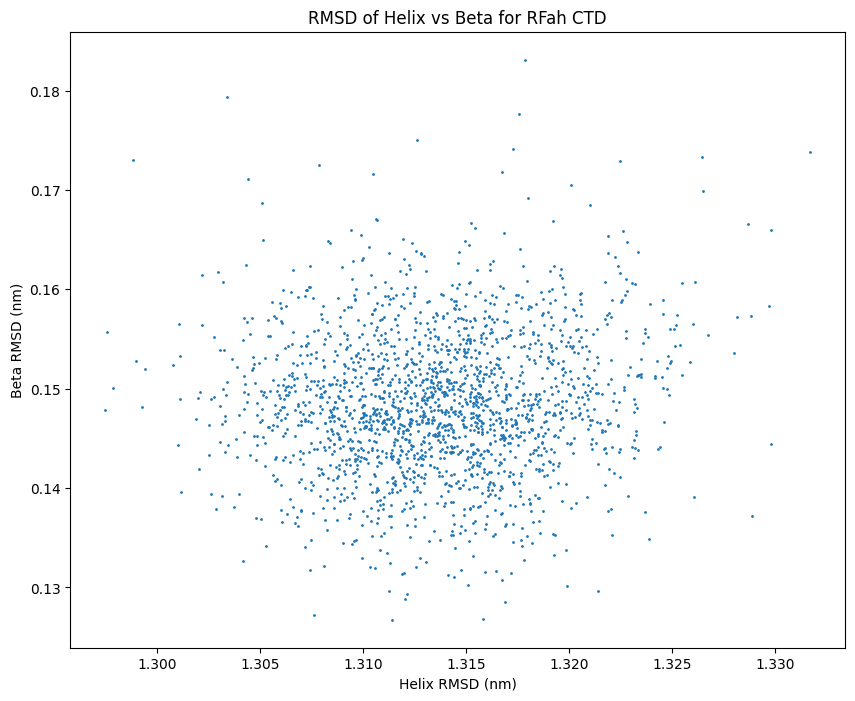

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(helix_rmsds, beta_rmsds, s=1)
ax.set_xlabel("Helix RMSD (nm)")
ax.set_ylabel("Beta RMSD (nm)")
# ax.set_xlim(0,4)
# ax.set_ylim(0,4)
ax.set_title("RMSD of Helix vs Beta for RFah CTD")
plt.show()

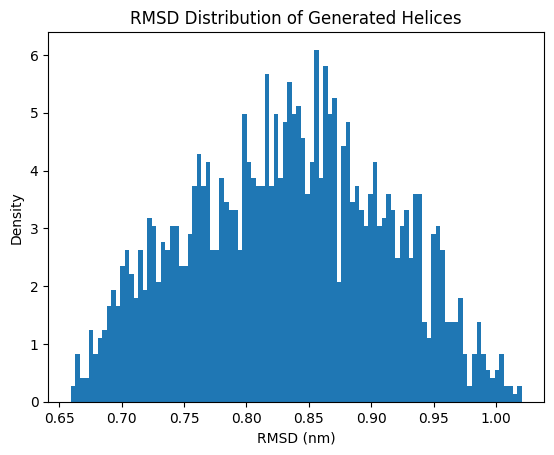

In [ ]:
fig, ax = plt.subplots()
ax.hist(helix_rmsds, bins=100, density=True)
ax.set_xlabel("RMSD (nm)")
ax.set_ylabel("Density")
ax.set_title("RMSD Distribution of Generated Helices")
plt.show()

In [6]:
np.argmin(all_rmsds)  # Index of the minimum RMSD

1578